# Application 1: Farm Scale Soil Moisture Estimation using Remote Sensing and Water Budget Products
## Step 2: Implementing a Machine Learning algorithm  

### Background: 
Once we have the information from the satellite band pixels and the respective soil moisture values, we can implement a machine learning algorithm that can correlate  the band pixels (we will call this input) and soil moisture (output). There are plenty of machine learning algorithms. A good website where examples and Python implemented algorithms are compiled is https://scikit-learn.org/stable/.



Let's install the necessary python library. Open the terminal and pass the following command.

Let's start importing the csv file generated in Step 2:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
sma = pd.read_csv('./Results Step 2/machine_learning_data.csv')
sma#.head(3)

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,ST_B6,SR_B7,AFRI1600,AFRI2100,ARVI,...,TDVI,TGI,TSAVI,TVI,TriVI,VARI,VIG,WDRVI,WDVI,SM
0,0.048572,0.081490,0.067767,0.389078,0.202627,299.068168,0.100602,0.488404,0.771035,0.778030,...,0.568337,2.455338,0.703324,1.096961,19.82750,0.136291,0.091938,-0.270538,0.321310,0.39
1,0.051515,0.084680,0.073432,0.385447,0.209448,299.368954,0.104040,0.472065,0.762177,0.764213,...,0.550804,2.383562,0.679949,1.086255,19.17080,0.105514,0.071136,-0.311561,0.312015,0.32
2,0.063257,0.097330,0.079070,0.370955,0.199245,299.871403,0.100630,0.476565,0.761127,0.708633,...,0.517179,2.683450,0.648597,1.071726,18.24350,0.161389,0.103515,-0.361334,0.291885,0.50
3,0.063257,0.097330,0.084707,0.363613,0.202682,300.469556,0.100630,0.462103,0.756890,0.703622,...,0.494096,2.486137,0.622111,1.059298,17.23920,0.106268,0.069340,-0.399329,0.278905,0.47
4,0.130055,0.169517,0.209860,0.271680,0.335288,318.506448,0.297117,0.102218,0.292979,0.352533,...,0.104750,0.955763,0.128380,0.792704,2.09550,-0.161809,-0.106339,-0.770761,0.061820,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.037325,0.070820,0.044310,0.562437,0.212637,304.837786,0.091197,0.600612,0.850013,0.875534,...,0.837752,2.937550,0.853943,1.163590,32.14805,0.340724,0.230261,0.118680,0.518127,0.17
67,0.075742,0.110667,0.119632,0.440557,0.296815,314.076694,0.170287,0.384410,0.676076,0.706595,...,0.533650,1.781725,0.572886,1.035802,18.89690,-0.058004,-0.038927,-0.461712,0.320925,0.11
68,0.080500,0.123922,0.141467,0.454170,0.329210,314.941453,0.183460,0.352806,0.663931,0.698880,...,0.509439,1.991275,0.524988,1.012417,18.06035,-0.094894,-0.066110,-0.513956,0.312702,0.08
69,0.056547,0.084102,0.073515,0.453977,0.206093,306.806565,0.094470,0.538911,0.811517,0.778473,...,0.646345,2.023863,0.721266,1.105109,23.25125,0.104754,0.067172,-0.236453,0.380462,0.16


## Setting Up the Machine Learning algorithm
Now that the data is in the adequate format (a table), we will run the ML algorithm. The bands will be inputs (x) and soil moisture the output (y)

Let's try all the data (all rows and all remote sensing information)

In [ ]:
X

Intercept: 0.31
Slope: 0.68


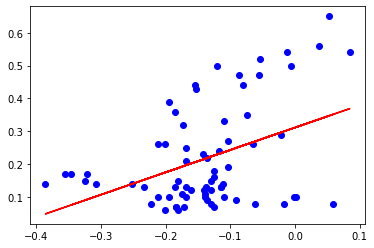

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from mlxtend.regressor import LinearRegression

X=sma.loc[:, sma.columns == 'NRFIr'].to_numpy()
# X=sma.loc[:, sma.columns != 'SM'].to_numpy()

t=sma[['SM']].to_numpy()
t=t.ravel()

ne_lr = LinearRegression()
ne_lr.fit(X, t)
y=ne_lr.predict(X)

print('Intercept: %.2f' % ne_lr.b_)
print('Slope: %.2f' % ne_lr.w_[0])

def lin_regplot(X, t, model):
    plt.scatter(X, t, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, t, ne_lr)
plt.show()

Let's plot the results

In [5]:
import math
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(t, y)
rmse = math.sqrt(mse)
print('RMSE = %.2f' %rmse, "m3/m3")

RMSE = 0.14 m3/m3


In [6]:
r2 = r2_score(t, y)
print("r2 =%.2f" %r2)

r2 =0.18


We have two questions: Which of the variables can best represent the variability in soil moisture and how we deal with a small number of variables.

For the first question, we can test each of the variables indivudually and then combine the most promissing.

For the second question, we need to use a concept called "CrossValidation". We will divide the total number of samples and change training and testing groups for "n" times, while tracking a goodness of fit statistic, like Mean Square Error or Coefficient of Determination (r2).

Let's implement this for Band 1 (blue)

In [23]:
xa

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,ST_B6,SR_B7,AFRI1600,AFRI2100,ARVI,...,SR2,TDVI,TGI,TSAVI,TVI,TriVI,VARI,VIG,WDRVI,WDVI
0,0.048572,0.081490,0.067767,0.389078,0.202627,299.068168,0.100602,0.488404,0.771035,0.778030,...,4.774543,0.568337,2.455338,0.703324,1.096961,19.82750,0.136291,0.091938,-0.270538,0.321310
1,0.051515,0.084680,0.073432,0.385447,0.209448,299.368954,0.104040,0.472065,0.762177,0.764213,...,4.551813,0.550804,2.383562,0.679949,1.086255,19.17080,0.105514,0.071136,-0.311561,0.312015
2,0.063257,0.097330,0.079070,0.370955,0.199245,299.871403,0.100630,0.476565,0.761127,0.708633,...,3.811312,0.517179,2.683450,0.648597,1.071726,18.24350,0.161389,0.103515,-0.361334,0.291885
3,0.063257,0.097330,0.084707,0.363613,0.202682,300.469556,0.100630,0.462103,0.756890,0.703622,...,3.735873,0.494096,2.486137,0.622111,1.059298,17.23920,0.106268,0.069340,-0.399329,0.278905
4,0.130055,0.169517,0.209860,0.271680,0.335288,318.506448,0.297117,0.102218,0.292979,0.352533,...,1.602666,0.104750,0.955763,0.128380,0.792704,2.09550,-0.161809,-0.106339,-0.770761,0.061820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.037325,0.070820,0.044310,0.562437,0.212637,304.837786,0.091197,0.600612,0.850013,0.875534,...,7.941789,0.837752,2.937550,0.853943,1.163590,32.14805,0.340724,0.230261,0.118680,0.518127
67,0.075742,0.110667,0.119632,0.440557,0.296815,314.076694,0.170287,0.384410,0.676076,0.706595,...,3.980911,0.533650,1.781725,0.572886,1.035802,18.89690,-0.058004,-0.038927,-0.461712,0.320925
68,0.080500,0.123922,0.141467,0.454170,0.329210,314.941453,0.183460,0.352806,0.663931,0.698880,...,3.664952,0.509439,1.991275,0.524988,1.012417,18.06035,-0.094894,-0.066110,-0.513956,0.312702
69,0.056547,0.084102,0.073515,0.453977,0.206093,306.806565,0.094470,0.538911,0.811517,0.778473,...,5.397907,0.646345,2.023863,0.721266,1.105109,23.25125,0.104754,0.067172,-0.236453,0.380462


In [7]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.preprocessing import minmax_scaling
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

xa=sma.loc[:, sma.columns != 'SM']
xb=xa.loc[:, xa.columns != 'CROP']
x=xb.to_numpy()

# robust scaling of the input data
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# transformer=scaler.fit(Xo)
# x=transformer.transform(Xo)
from mlxtend.preprocessing import minmax_scaling
columns=range(0,97)
x=minmax_scaling(x,columns=columns)
x

array([[0.15986596, 0.1497006 , 0.14006116, ..., 0.63040036, 0.47566138,
        0.46703623],
       [0.18095801, 0.16954662, 0.16525994, ..., 0.57481634, 0.43702502,
        0.45030687],
       [0.26512911, 0.24824636, 0.19033639, ..., 0.66133231, 0.39014775,
        0.41407642],
       ...,
       [0.38872462, 0.41368691, 0.46788991, ..., 0.20809366, 0.24640302,
        0.45154425],
       [0.21703134, 0.16595381, 0.16562691, ..., 0.56422466, 0.50776421,
        0.5735003 ],
       [0.54208555, 0.49546621, 0.5751682 , ..., 0.13297034, 0.03561249,
        0.04043754]])

In [8]:
model = LinearRegression(method='svd')

In [9]:
# Forward Variable Selection(fvs)
fvs = SFS(model,
          k_features='parsimonious', #best or parsimonious (simplest model within 1 CI of best)
          forward=True,
          floating=False,
          verbose =0,
          cv=8,
          n_jobs=4,
          scoring = 'neg_mean_squared_error') #neg_mean_squared_error

In [10]:
fvs.fit(x, t)
# sfs.k_feature_names_ 

SequentialFeatureSelector(cv=8,
                          estimator=<mlxtend.regressor.linear_regression.LinearRegression object at 0x7f9a89fc3a60>,
                          k_features=(1, 97), n_jobs=4,
                          scoring='neg_mean_squared_error')

we can access the indices of the best features directly via the k_feature_idx_ attribute:

In [61]:
inputs=list(fvs.k_feature_idx_)
inputs

[5, 18, 20, 67, 70]

In [69]:
# input_names=list(xb.columns)

# selected_inputs =input_names[inputs]
# selected_inputs


the prediction score for these selected features can be accesses via k_score_:

In [50]:
fvs.k_score_

-0.007995548287689476

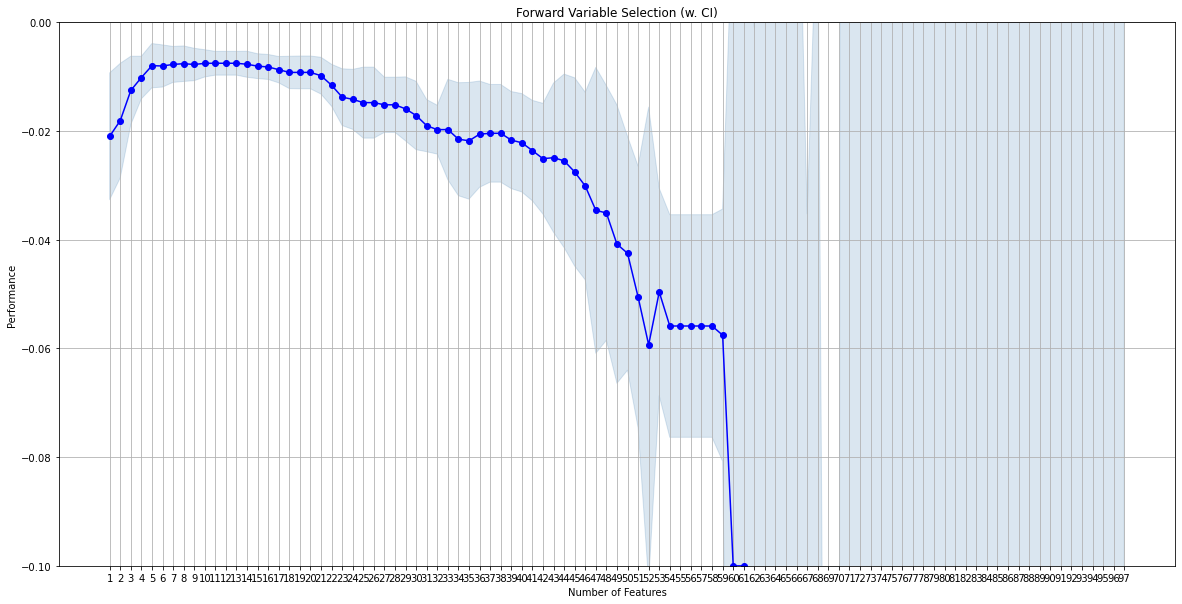

In [51]:
fig_fvs = plot_sfs(fvs.get_metric_dict(), kind='ci',figsize=(20,10))
plt.title('Forward Variable Selection (w. CI)')
plt.grid()
plt.ylim(-0.1, 0)
plt.show()

In [52]:
sfs_results=pd.DataFrame.from_dict(fvs.get_metric_dict()).T
sfs_results.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(70,)","[-0.04129678908380529, -0.0088560779729975, -0...",-0.020982,"(70,)",0.011661,0.013379,0.005057
2,"(5, 70)","[-0.02338493173776565, -0.041209597797577796, ...",-0.018103,"(5, 70)",0.010531,0.012082,0.004567
3,"(5, 67, 70)","[-0.015528639870993137, -0.026348829166041327,...",-0.012553,"(5, 67, 70)",0.006289,0.007216,0.002727
4,"(5, 20, 67, 70)","[-0.016522363838785865, -0.016607752455315112,...",-0.010176,"(5, 20, 67, 70)",0.003913,0.00449,0.001697
5,"(5, 18, 20, 67, 70)","[-0.011819066082839379, -0.015632397589991163,...",-0.007996,"(5, 18, 20, 67, 70)",0.004073,0.004673,0.001766


In [53]:
#backward variable selection(bvs)
bvs = SFS(model,
         k_features='parsimonious',
         forward=False,
         floating=False,
         verbose =0,
         cv=8,
          n_jobs=4,
          scoring = 'neg_mean_squared_error') #neg_mean_squared_error

In [54]:
bvs.fit(x, t.ravel())
# sfs1.k_feature_names_

SequentialFeatureSelector(cv=8,
                          estimator=<mlxtend.regressor.linear_regression.LinearRegression object at 0x7f4d028818b0>,
                          forward=False, k_features=(1, 97), n_jobs=4,
                          scoring='neg_mean_squared_error')

In [41]:
(bvs.k_feature_idx_)

(3,
 5,
 7,
 8,
 9,
 10,
 12,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 34,
 37,
 39,
 41,
 43,
 44,
 48,
 49,
 50,
 51,
 59,
 61,
 63,
 65,
 70,
 73,
 74,
 76,
 79,
 86,
 88,
 93)

In [42]:
bvs.k_score_

-0.014564335246830942

In [43]:
bvs_results=pd.DataFrame.from_dict(bvs.get_metric_dict()).T
bvs_results.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
97,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.014865989374805192, -0.30489275504654006, ...",-24.562625,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",51.782518,59.411717,22.455518
96,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.03477016794430601, -0.26746226464260103, -...",-14.579786,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",28.855903,33.107289,12.513379
95,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.03968433470168314, -0.5575581958217952, -1...",-10.807015,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",19.75772,22.668656,8.567947
94,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.04451595899522616, -0.5673118735264766, -1...",-4.475519,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",4.540117,5.209019,1.968824
93,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.13065936770955885, -3.971230810029335, -2....",-3.225066,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3.336311,3.827855,1.446793


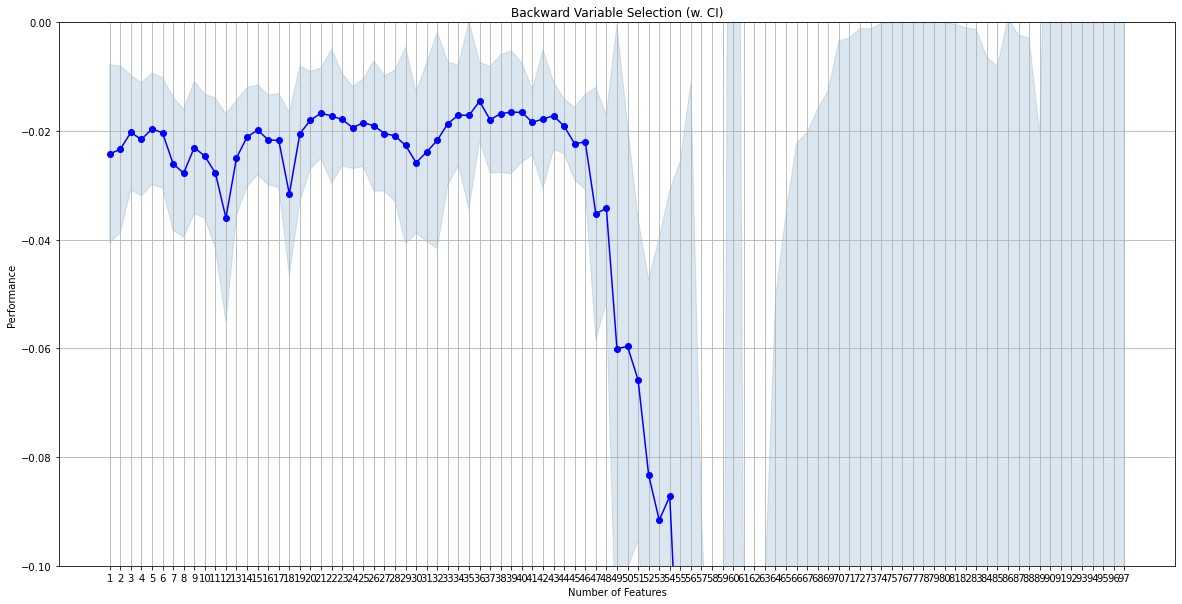

In [44]:
# bvs.k_feature_names_
fig1 = plot_sfs(bvs.get_metric_dict(), kind='ci',figsize=(20,10))
plt.title('Backward Variable Selection (w. CI)')
plt.grid()
plt.ylim(-0.1, 0)
plt.show()

Let's do the same for all the other inputs

Using the three best bands

In [ ]:
X=sm[['B1','B3','B2','B4','B5','B6', 'B7']].to_numpy()

clf.fit(X, y_train.ravel())
scores = clf.cv_results_['mean_test_score']

B7_gamma_sel = gammas[scores == np.max(scores)]
print(B7_gamma_sel[0])

model = EMRVR(kernel='rbf', gamma=B7_gamma_sel[0],bias_used=False)
model.fit(X, y_train.ravel())

y, y_std = model.predict(X, return_std=True)

mse = mean_squared_error(y_train, y)
B7_rmse = math.sqrt(mse)
print('RMSE = %.2f' %B7_rmse, "m3/m3")

B7_r2 = r2_score(y_train, y)
print("r2 =%.2f" %B7_r2)

In [ ]:
plt.scatter(xl, y_train, facecolor='none', edgecolor='g', label='training')
plt.scatter(xl[model.relevance_], y_train[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')
plt.plot(xl[:, None], y, color='r', label='predict mean')
plt.fill_between(xl, y - y_std, y + y_std, color='pink', alpha=0.5, label='predict std.')
plt.legend(loc='best')
plt.ylabel("SM (m3/m3)")

plt.show()

In [ ]:
plt.scatter(y_train,y, facecolor='none', edgecolor='g')
plt.scatter(y_train[model.relevance_], y[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')

plt.xlabel("SM RVM (m3/m3)")
plt.ylabel("SM (m3/m3)")

axes = plt.gca()
axes.set_xlim([0,0.7])
axes.set_ylim([0,0.7])

xx = np.linspace(0,0.7,len(y))
yx = xx
plt.plot(xx, yx, '-r', label='y=x')
plt.fill_between(xx, yx - y_std, yx + y_std, color='pink', alpha=0.5, label='predict std.')

We found a winner! In the next step we will apply this RVM model to all four Landsat images 

https://towardsdatascience.com/how-to-identify-the-right-independent-variables-for-machine-learning-supervised-algorithms-439986562d32